# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [14]:
#  1. Get the total rides for each city type
#pyber_data_df.dtypes


rides_by_type = pyber_data_df.groupby(["city"]).count()["ride_id"]
rides_by_type



city
Amandaburgh         18
Barajasview         22
Barronchester       16
Bethanyland         18
Bradshawfurt        10
                    ..
West Robert         31
West Samuelburgh    25
Williamsonville     14
Williamsstad        23
Williamsview        20
Name: ride_id, Length: 120, dtype: int64

In [39]:
# 2. Get the total drivers for each city type

city_driver_count = pyber_data_df.groupby(["type","city"]).sum()["driver_count"]
city_driver_count


type   city               
Rural  Bradshawfurt             70
       Garzaport                21
       Harringtonfort           24
       Jessicaport               6
       Lake Jamie               24
                              ... 
Urban  West Patrickchester     400
       West Robert            1209
       West Samuelburgh       1825
       Williamsstad           1357
       Williamsview            920
Name: driver_count, Length: 120, dtype: int64

In [47]:
#  3. Get the total amount of fares for each city type

fare_total = pyber_data_df.groupby(["type","city"]).sum()['fare']
fare_total

type   city               
Rural  Bradshawfurt           400.64
       Garzaport               72.37
       Harringtonfort         200.82
       Jessicaport            216.08
       Lake Jamie             206.15
                               ...  
Urban  West Patrickchester    451.73
       West Robert            778.84
       West Samuelburgh       544.19
       Williamsstad           560.33
       Williamsview           531.98
Name: fare, Length: 120, dtype: float64

In [48]:
#  4. Get the average fare per ride for each city type. 
fare_avg = pyber_data_df.groupby(["type"]).mean()['fare']
fare_avg

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [49]:
# 5. Get the average fare per driver for each city type. 


avg_driver_fare = fare_total/city_driver_count
avg_driver_fare



type   city               
Rural  Bradshawfurt            5.723429
       Garzaport               3.446190
       Harringtonfort          8.367500
       Jessicaport            36.013333
       Lake Jamie              8.589583
                                ...    
Urban  West Patrickchester     1.129325
       West Robert             0.644202
       West Samuelburgh        0.298186
       Williamsstad            0.412918
       Williamsview            0.578239
Length: 120, dtype: float64

In [40]:
#  6. Create a PyBer summary DataFrame. 
pyber_data_summary_df = pyber_data_df.groupby(['type','city']).sum()['fare']

pyber_data_summary_df

type   city               
Rural  Bradshawfurt           400.64
       Garzaport               72.37
       Harringtonfort         200.82
       Jessicaport            216.08
       Lake Jamie             206.15
                               ...  
Urban  West Patrickchester    451.73
       West Robert            778.84
       West Samuelburgh       544.19
       Williamsstad           560.33
       Williamsview           531.98
Name: fare, Length: 120, dtype: float64

In [52]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df = pd.DataFrame({
        "Total Rides": rides_by_type,
        "Total Drivers": city_driver_count.mean(),
        "Total Fares": fare_total,
        "Average Fare": avg_driver_fare
})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare
"(Rural, Bradshawfurt)",NaN,572.575,400.64,5.723429
"(Rural, Garzaport)",NaN,572.575,72.37,3.446190
"(Rural, Harringtonfort)",NaN,572.575,200.82,8.367500
"(Rural, Jessicaport)",NaN,572.575,216.08,36.013333
"(Rural, Lake Jamie)",NaN,572.575,206.15,8.589583
...,...,...,...,...
West Robert,31.0,572.575,NaN,NaN
West Samuelburgh,25.0,572.575,NaN,NaN
Williamsonville,14.0,572.575,NaN,NaN
Williamsstad,23.0,572.575,NaN,NaN


In [31]:
#  8. Format the columns.
pyber_data_summary_df 

type   city               
Rural  Bradshawfurt           400.64
       Garzaport               72.37
       Harringtonfort         200.82
       Jessicaport            216.08
       Lake Jamie             206.15
                               ...  
Urban  West Patrickchester    451.73
       West Robert            778.84
       West Samuelburgh       544.19
       Williamsstad           560.33
       Williamsview           531.98
Name: fare, Length: 120, dtype: float64

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [53]:
# 1. Read the merged DataFrame
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [54]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

total_fare_per_day =pyber_data_df.groupby(["type","date"]).sum()['fare']
total_fare_per_day


type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [55]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

total_fare_per_day = total_fare_per_day.reset_index()
total_fare_per_day


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [58]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

total_fare_per_day_pivot = total_fare_per_day.pivot(index='date', columns='type', values='fare')
total_fare_per_day_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [60]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

jan_apr_fare_per_day = total_fare_per_day_pivot.loc['2019-01-01':'2019-04-29']
jan_apr_fare_per_day.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [61]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

jan_apr_fare_per_day.index = pd.to_datetime(jan_apr_fare_per_day.index)
jan_apr_fare_per_day

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [62]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_apr_fare_per_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [63]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

jan_apr_fare_per_week = jan_apr_fare_per_day.resample("W").sum()
jan_apr_fare_per_week.tail()


type,Rural,Suburban,Urban
date,,,
2019-03-31,199.42,1045.06,1942.77
2019-04-07,501.24,1010.73,2356.70
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80
2019-04-28,191.85,1357.75,2238.29


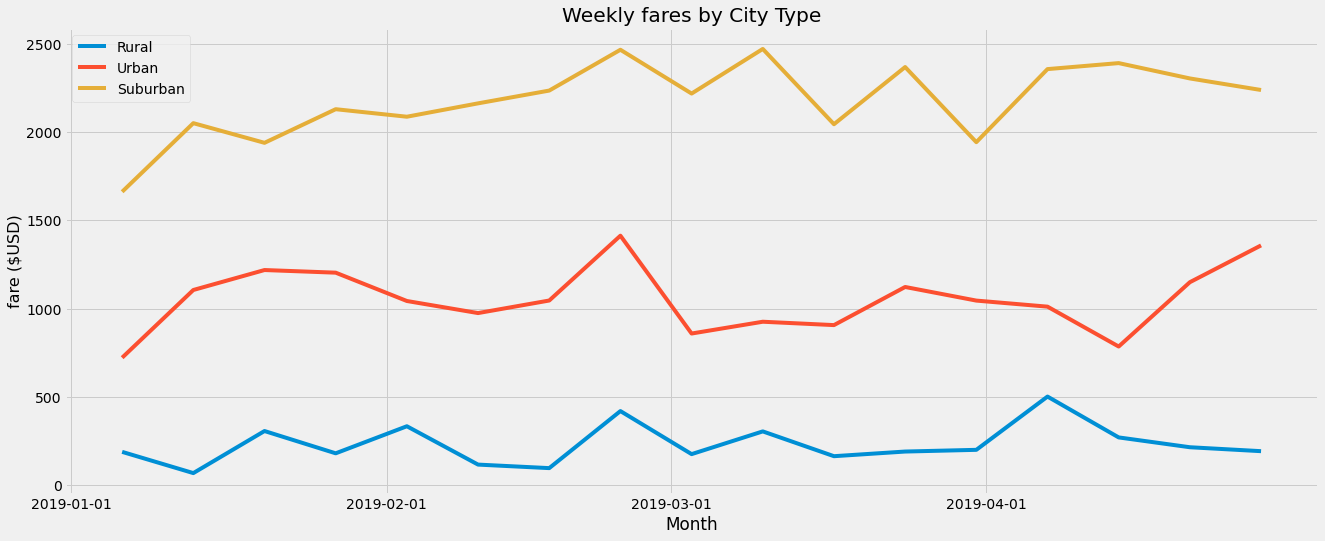

In [69]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(jan_apr_fare_per_week)
ax.set_ylabel("fare ($USD)", fontsize=16)
ax.set_xticks(pd.date_range(start = '2019-01-01', end = '2019-04-30', freq="MS"))
ax.set_title("Weekly fares by City Type")
ax.set_xlabel("Month")
ax.legend(['Rural', 'Urban', 'Suburban'])



